# Understanding Fitts's Law

Fitts's Law is a predictive model of human movement that describes the relationship between the distance to a target, the size of the target, and the time required to move to and select that target. It is fundamental in human-computer interaction (HCI) and user interface design.

## Theory

Proposed by Paul Fitts in 1954, the law suggests that the time required to rapidly move to a target area is a function of:
1. The distance to the target
2. The size of the target

The larger and closer a target is, the faster and easier it is to select it.

## Mathematical Formula

The most common formulation of Fitts's Law is:

MT = a + b * log₂(2D/W)

Where:
- MT = Movement Time
- a = Start/stop time (intercept)
- b = Speed of movement (slope)
- D = Distance from starting point to target
- W = Width of the target
- log₂(2D/W) = Index of Difficulty (ID)

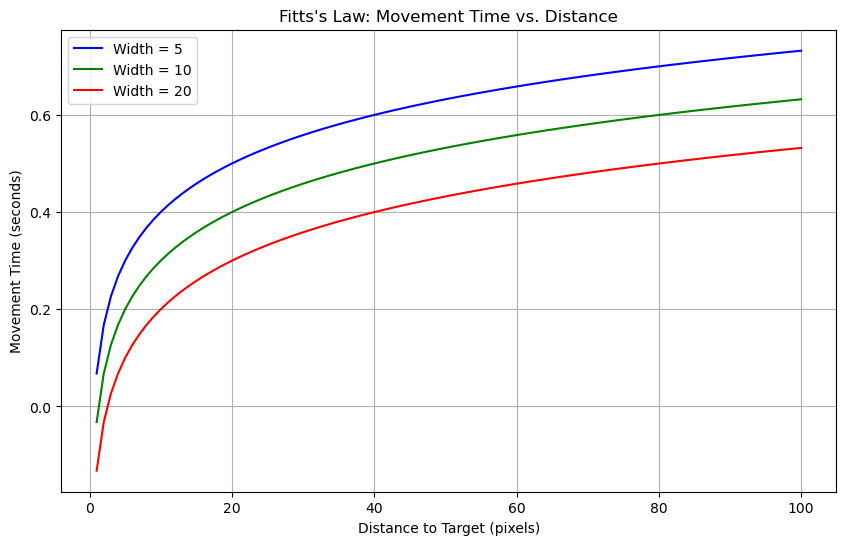

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fitts_law(distance, width, a=0.2, b=0.1):
    """Calculate movement time using Fitts's Law"""
    return a + b * np.log2(2 * distance / width)

# Create data for visualization
distances = np.linspace(1, 100, 100)
widths = [5, 10, 20]
colors = ['b', 'g', 'r']

plt.figure(figsize=(10, 6))
for width, color in zip(widths, colors):
    times = fitts_law(distances, width)
    plt.plot(distances, times, color=color, label=f'Width = {width}')

plt.xlabel('Distance to Target (pixels)')
plt.ylabel('Movement Time (seconds)')
plt.title("Fitts's Law: Movement Time vs. Distance")
plt.legend()
plt.grid(True)
plt.show()

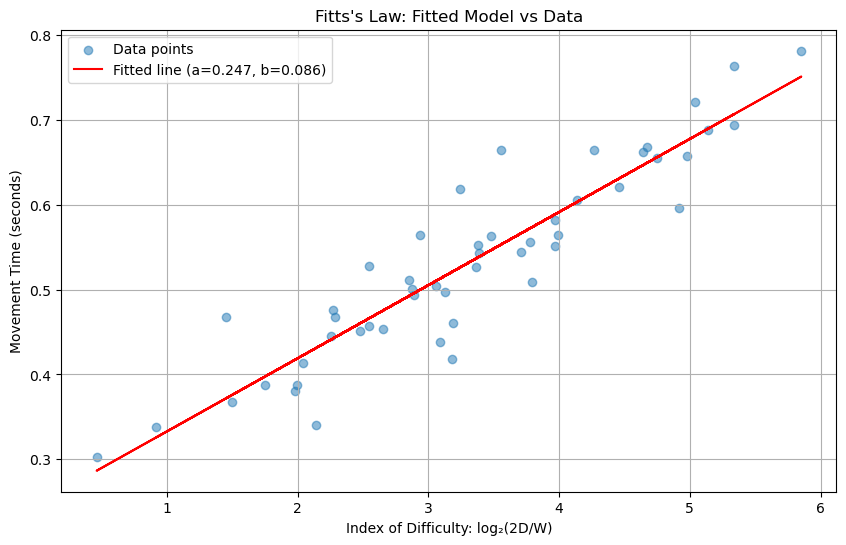

In [ ]:
# Generate synthetic data with some random noise
np.random.seed(42)
n_points = 50

# Generate random distances and widths
rand_distances = np.random.uniform(10, 200, n_points)
rand_widths = np.random.uniform(5, 30, n_points)

# Calculate times using Fitts's Law with added noise
true_a, true_b = 0.2, 0.1
noise = np.random.normal(0, 0.05, n_points)
rand_times = fitts_law(rand_distances, rand_widths, true_a, true_b) + noise

# Fit the data
from scipy.optimize import curve_fit

def fitts_law_fit(X, a, b):
    D, W = X
    return a + b * np.log2(2 * D / W)

# Prepare data for curve fitting
X = (rand_distances, rand_widths)
popt, _ = curve_fit(fitts_law_fit, X, rand_times)
fitted_a, fitted_b = popt

# Calculate fitted times for plotting
fitted_times = fitts_law_fit(X, fitted_a, fitted_b)

# Create scatter plot with fitted line
plt.figure(figsize=(10, 6))
plt.scatter(np.log2(2 * rand_distances / rand_widths), rand_times,
           alpha=0.5, label='Data points')
plt.plot(np.log2(2 * rand_distances / rand_widths), fitted_times,
         'r-', label=f'Fitted line (a={fitted_a:.3f}, b={fitted_b:.3f})')

plt.xlabel('Index of Difficulty: log₂(2D/W)')
plt.ylabel('Movement Time (seconds)')
plt.title("Fitts's Law: Fitted Model vs Data")
plt.legend()
plt.grid(True)
plt.show()


## Practical Applications

Fitts's Law has numerous applications in UI/UX design:

1. **Menu Design**: Placing frequently used items closer to the user's typical cursor position
2. **Button Sizing**: Making important buttons larger and easier to click
3. **Screen Edges**: Utilizing screen edges as "infinite width" targets
4. **Mobile Design**: Ensuring touch targets are appropriately sized

Let's create a simple example to calculate target acquisition times for different UI elements:

In [ ]:
def compare_ui_elements():
    # Example UI elements
    elements = {
        'Small button (far)': {'distance': 300, 'width': 20},
        'Large button (far)': {'distance': 300, 'width': 60},
        'Small button (near)': {'distance': 100, 'width': 20},
        'Large button (near)': {'distance': 100, 'width': 60}
    }

    print("Estimated movement times for different UI elements:")
    print("-" * 50)

    for element, params in elements.items():
        time = fitts_law(params['distance'], params['width'])
        print(f"{element}: {time:.3f} seconds")

compare_ui_elements()

## Design Guidelines Based on Fitts's Law

1. **Make frequently used targets larger**
2. **Place important elements closer to expected cursor positions**
3. **Consider using corners and edges for important UI elements**
4. **Ensure adequate spacing between clickable elements**
5. **Make touch targets at least 44x44 pixels for mobile interfaces**

Understanding and applying Fitts's Law helps create more efficient and user-friendly interfaces by optimizing the size and placement of interactive elements.